In [406]:
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
import lz4.frame
from wremnants import plot_tools, scetlib_corrections
from wremnants import boostHistHelpers as hh

In [304]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [784]:
with lz4.frame.open("/home/k/kelong/work/WRemnants/w_z_gen_dists.pkl.lz4") as minnlof:
    minnlo = pickle.load(minnlof)
minnloh = minnlo["WminusmunuPostVFP"]["output"]["nominal_gen"]*minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]/minnlo["WminusmunuPostVFP"]["weight_sum"]
minnlopdfh = minnlo["ZmumuPostVFP"]["output"]["pdfNNPDF31"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]
minnlohZ = minnlo["ZmumuPostVFP"]["output"]["nominal_gen"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]

In [655]:
minnloh

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  storage=Weight()) # Sum: WeightedSum(value=8452.04, variance=0.407338) (WeightedSum(value=8562.66, variance=0.411874) with flow)

In [646]:
scetlibh = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/Ztests/inclusive_Z_pT.npz")
scetlibh[0,...]

Hist(
  Variable([50, 13000], name='mass', label='mass'),
  Variable([-10, 10], name='y', label='y'),
  Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.]), name='pt', label='pt'),
  storage=Weight()) # Sum: WeightedSum(value=1788.48, variance=1.72709)

In [647]:
minnlopdfh[0,...]

Hist(
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Integer(0, 1, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(0, 101, underflow=False, overflow=False, name='tensor_axis_0', label='tensor_axis_0'),
  storage=Weight()) # Sum: WeightedSum(value=1898.16, variance=0.0620733) (WeightedSum(value=1914.11, variance=0.0624987) with flow)

In [489]:
scetlibh_A4 = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/inclusive_Z_pT_A4.npz")

In [452]:
scetlibh_const = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/inclusive_Z_pT_const.npz")

In [467]:
scetlibh_tot = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/inclusive_Z_pT.npz")

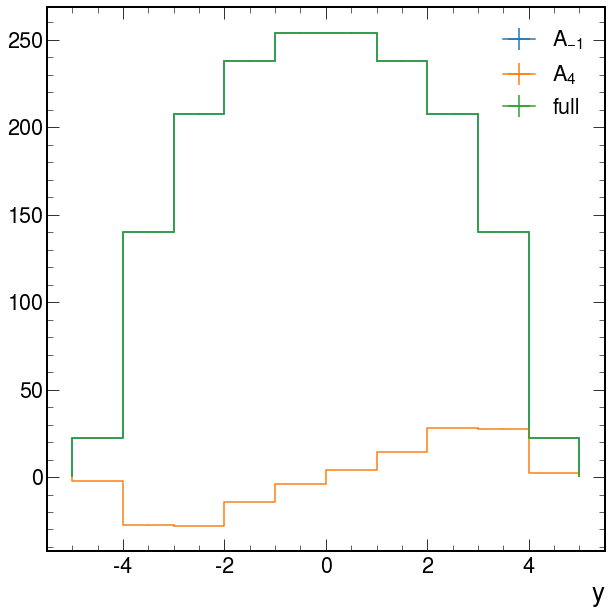

In [468]:
scetlibh_const.project("y").plot(label="A$_{-1}$")
scetlibh_A4.project("y").plot(label="A$_{4}$")
scetlibh_tot.project("y").plot(label="full")
plt.legend()

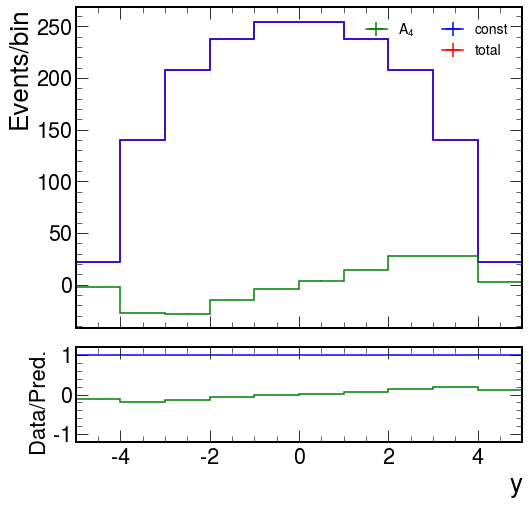

In [488]:
fig = plot_tools.makePlotWithRatioToRef([scetlibh_tot.project("y"), scetlibh_const.project("y"), scetlibh_A4.project("y")], xlim=[-5, 5],colors=["red", "blue", "green"], labels=["total", "const", "A$_{4}$"], rrange=[-1.2, 1.2], binwnorm=1.)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1adea2c50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

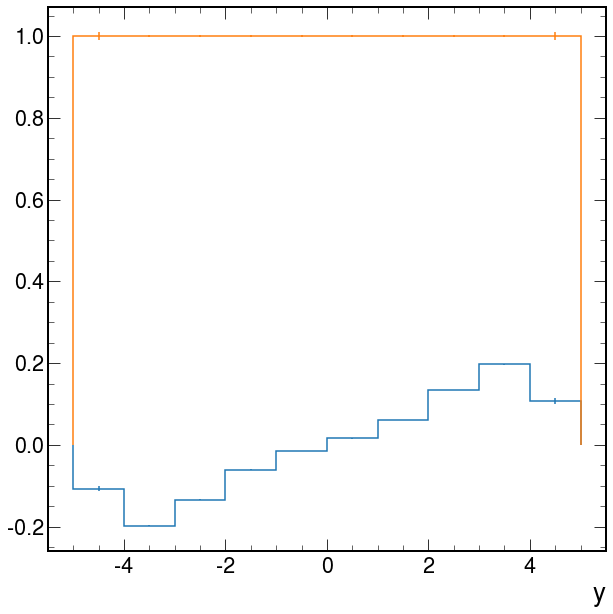

In [485]:
hh.divideHists(scetlibh_A4.project("y"), scetlibh_tot.project("y")).plot()
hh.divideHists(scetlibh_const.project("y"), scetlibh_tot.project("y")).plot()
#plt.ylim([0.9, 1.1])

In [492]:
scetlibh_A4.project("")

Hist(
  Integer(0, 1, name='vars', label='vars'),
  Variable([60, 120], name='mass', label='mass'),
  Variable([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], name='y', label='y'),
  Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.]), name='pt', label='pt'),
  storage=Weight()) # Sum: WeightedSum(value=-1.02175e-15, variance=0.206268)

ValueError: The axis name ptVgen could not be found

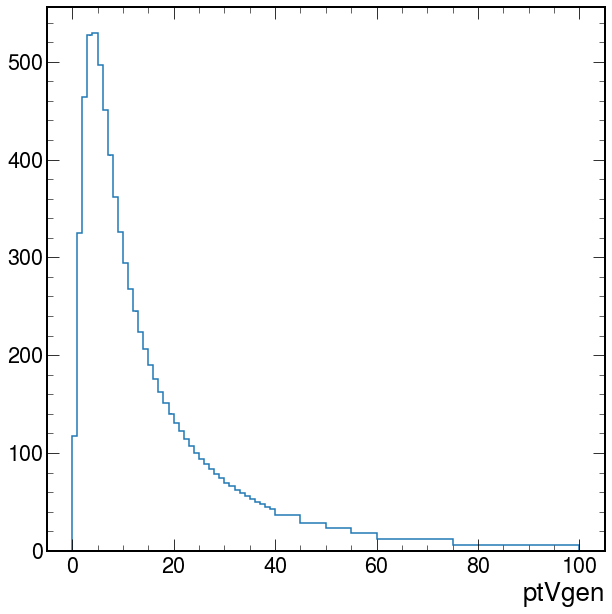

In [642]:
minnloh.project("ptVgen").plot(label="scetlib", binwnorm=True)
scetlibh.project("ptVgen").plot(label="minnlo")

In [364]:
minnloh.project("ptVgen")

Hist(Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'), storage=Weight()) # Sum: WeightedSum(value=1942.57, variance=0.0613649) (WeightedSum(value=1976.1, variance=0.0622546) with flow)

In [365]:
scetlibh.project("ptVgen")

Hist(Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'), storage=Weight()) # Sum: WeightedSum(value=180636, variance=174.436)

In [314]:
x.value/minnlo["ZmumuPostVFP"]["weight_sum"]

0.946494580094882

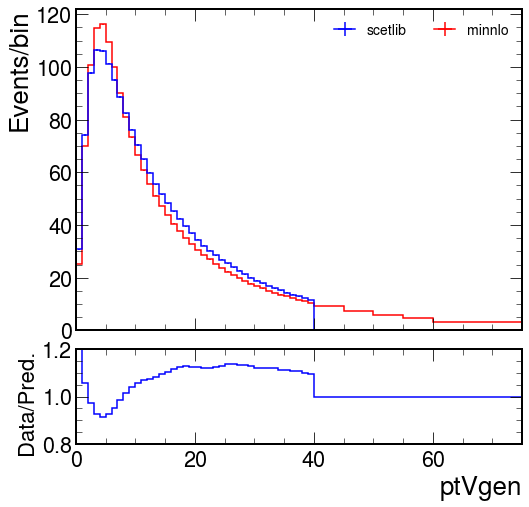

In [386]:
fig = plot_tools.makePlotWithRatioToRef([minnloh.project("ptVgen"), scetlibh.project("ptVgen")], colors=["red", "blue"], labels=["minnlo", "scetlib"], rrange=[0.8, 1.2], binwnorm=1.)


In [316]:
from scipy import special

In [317]:
mid = 25
k=0.2

In [318]:
corr = np.ones(len(pt_axis.edges)+1)
corr[1:] = 0.5*(1-special.erf(k*(pt_axis.edges-mid)))

In [319]:
corr

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999999e-01, 9.99999992e-01, 9.99999961e-01,
       9.99999822e-01, 9.99999239e-01, 9.99996987e-01, 9.99988955e-01,
       9.99962493e-01, 9.99881983e-01, 9.99655743e-01, 9.99068577e-01,
       9.97661133e-01, 9.94545251e-01, 9.88174192e-01, 9.76142560e-01,
       9.55156989e-01, 9.21350396e-01, 8.71050482e-01, 8.01928045e-01,
       7.14196178e-01, 6.11351295e-01, 5.00000000e-01, 3.88648705e-01,
       2.85803822e-01, 1.98071955e-01, 1.28949518e-01, 7.86496035e-02,
       4.48430109e-02, 2.38574401e-02, 1.18258083e-02, 5.45474918e-03,
       2.33886749e-03, 9.31423149e-04, 3.44256948e-04, 1.18017208e-04,
       3.75065973e-05, 1.10452485e-05, 7.70862896e-09, 7.68718422e-13,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1b16c8610>, errorbar=None, legend_artist=None)]

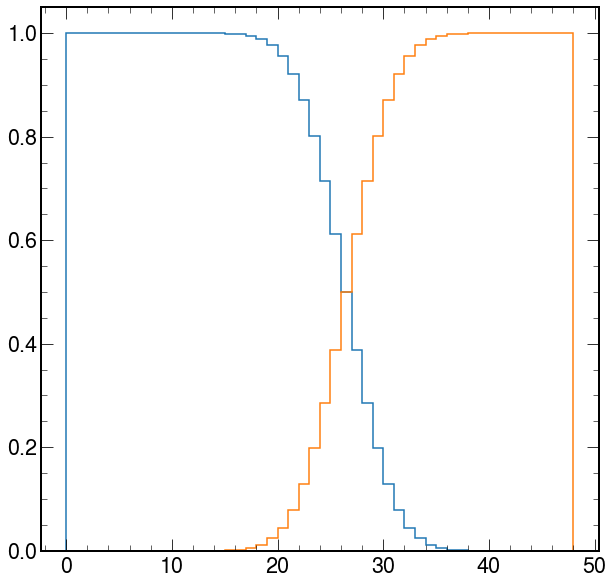

In [320]:
hep.histplot(corr)
hep.histplot(1-corr)

In [321]:
scetlibh.shape

(101, 1, 1, 46)

In [322]:
minnlocorr[...] = minnloh.view(flow=True)*(1-corr[np.newaxis,np.newaxis,:,np.newaxis,])
scetlibcorr = scetlibh*corr[np.newaxis,np.newaxis,np.newaxis,1:-1]

In [323]:
corrh_pt = scetlibcorr.project("ptVgen")+minnlocorr.project("ptVgen")

In [324]:
hists = [corrh_pt] + [x .project("ptVgen") for x in [minnloh, scetlibh, minnlocorr, scetlibcorr]]
labels = [r"MiNNLO$\bigoplus$SCETlib", "MiNNLO", "SCETlib", "MiNNLO turnon", "SCETlib turnoff"]
colors = ["blue", "orange", "purple", "red", "green"]

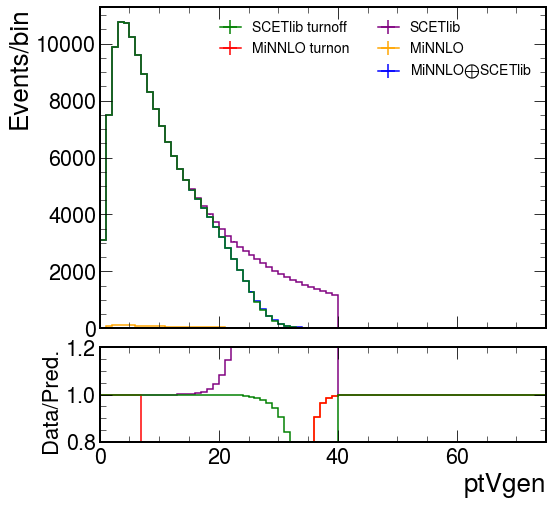

In [325]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=labels, rrange=[0.8, 1.2], binwnorm=1.)#, rlabel="x/MiNNO+Stlib")

In [326]:
pdfPtV = minnlopdfh.project("ptVgen", "tensor_axis_0")

In [327]:
diff = hh.addHists(pdfPtV[:, 0], -1*pdfPtV)
diff

Hist(
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Integer(0, 101, underflow=False, overflow=False, name='tensor_axis_0', label='tensor_axis_0'),
  storage=Weight()) # Sum: WeightedSum(value=13.1079, variance=12.3976) (WeightedSum(value=12.9773, variance=12.5777) with flow)

In [328]:
sq = hh.multiplyHists(diff, diff)

In [329]:
ss = sq.project("ptVgen")

In [330]:
ss[...] = np.stack((np.sqrt(ss.values()), ss.variances()), axis=-1)

In [331]:
pdfUp = pdfPtV[:,0]+ss
pdfDown = pdfPtV[:,0]+-1*ss

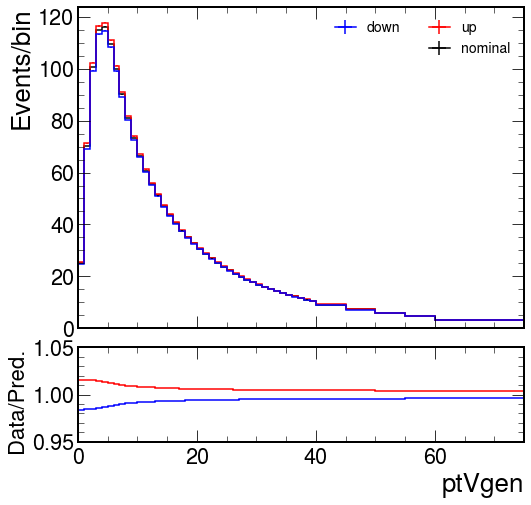

In [332]:
fig = plot_tools.makePlotWithRatioToRef([pdfPtV[:,0], pdfUp, pdfDown], colors=["black", "red", "blue"], labels=["nominal", "up", "down"], rrange=[0.95, 1.05], binwnorm=1.)

In [333]:
newh = hh.addHists(pdfPtV[:,0], -1*pdfPtV)

In [334]:
newh1 = hh.addHists(pdfPtV[:,0], -1*pdfPtV[:,1])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1a7790d90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

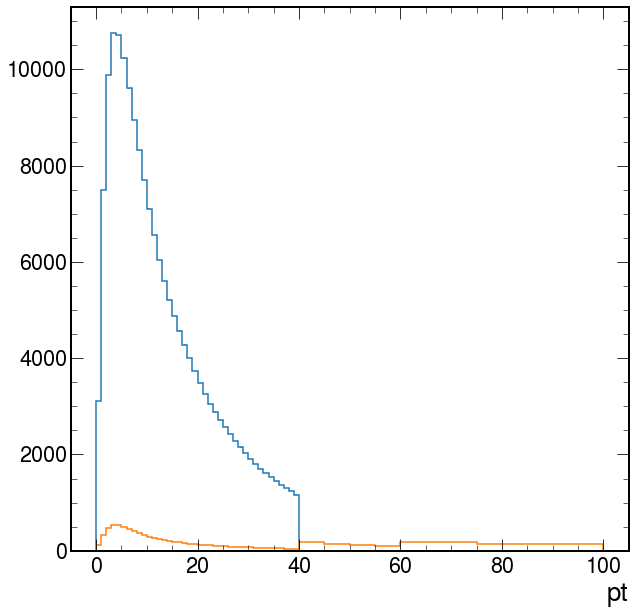

In [654]:
scetlibh.project("pt").plot()
minnloh.project("ptVgen").plot()

In [607]:
scetlibh_A4_s = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/W/inclusive_W_A4.npz")
scetlibh_A4_nons = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/W/inclusive_W_A4_nonsing.npz")
scetlibh_A0 = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/W/inclusive_W_A0_nonsing.npz")
scetlibh_const = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/W/inclusive_W_const.npz")
scetlibh_tot = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/W/inclusive_W.npz")


scetlibh_A4 = scetlibh_A4_s+scetlibh_A4_nons
view = scetlibh_A4.view()
scetlibh_A4[...,0:5,:] = view[...,0:5,:]*-1
#scetlibh_A4[...,5:,:] = view[...,5:,:]*-1

In [651]:
scetlibh_tot = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/W/inclusive_W.npz")

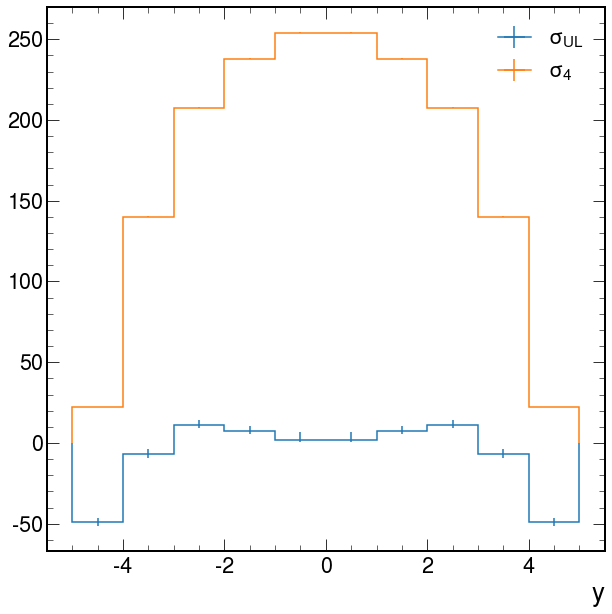

In [598]:
scetlibh_A4.project("y").plot(label=r"$\sigma_{\mathrm{UL}}$")
scetlibh_tot.project("y").plot(label=r"$\sigma_{4}$")
plt.legend()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1abe740a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

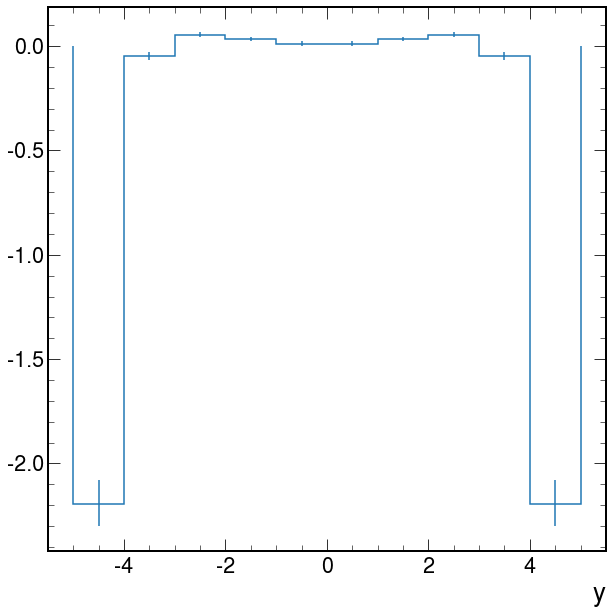

In [596]:
hh.divideHists(scetlibh_A4.project("y"), scetlibh_tot.project("y"), cutoff=0.0001).plot()

In [574]:
scetlibh_A4.project("y").values()

array([-45.20598115,  -5.25261608,  13.17303199,   8.47678161,
         2.35736831,   2.35736831,   8.47678161,  13.17303199,
        -5.25261608, -45.20598115])

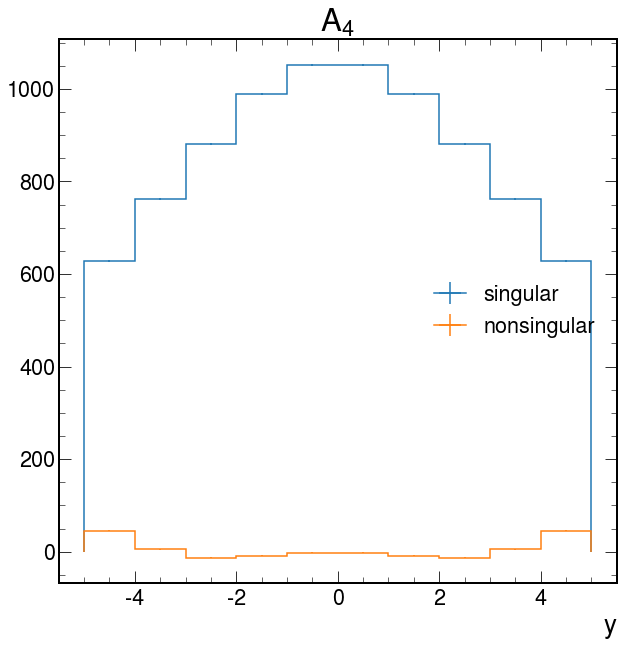

In [582]:
scetlibh_A4_nons.project("y").plot(label="singular")
scetlibh_A4.project("y").plot(label="nonsingular")
plt.title("A$_{4}$")
plt.legend()

In [631]:
minnloh

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  storage=Weight()) # Sum: WeightedSum(value=8452.04, variance=0.407338) (WeightedSum(value=8562.66, variance=0.411874) with flow)

In [634]:
scetlibh_const

Hist(
  Integer(0, 1, name='vars', label='vars'),
  Variable([4, 13000], name='mass', label='mass'),
  Variable([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], name='y', label='y'),
  Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.]), name='pt', label='pt'),
  storage=Weight()) # Sum: WeightedSum(value=57116.6, variance=69.7527)

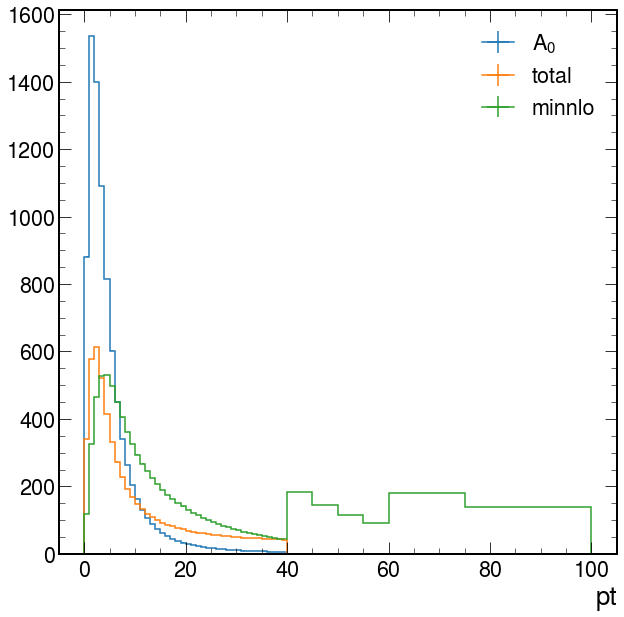

In [656]:
scetlibh_A0.project("pt").plot(label="A$_{0}$")
(0.1*scetlibh_tot.project("pt")).plot(label="total")
minnloh.project("ptVgen").plot(label="minnlo")
plt.legend()

In [658]:
scetlibhZ = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/inclusive_Z_pT.npz")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1a7424490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

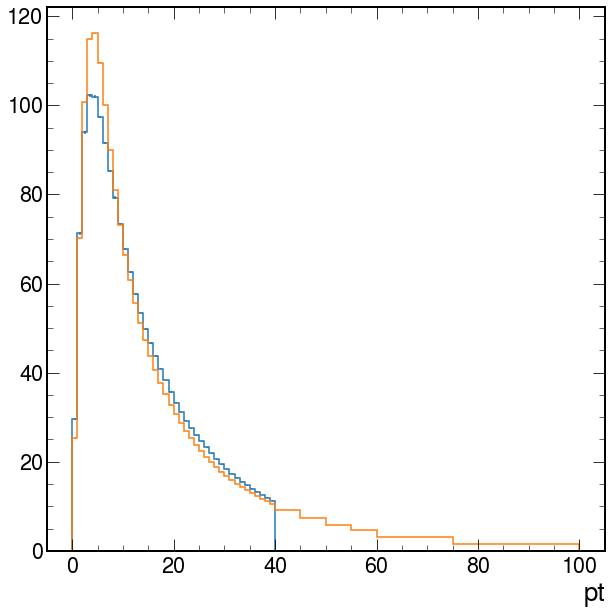

In [664]:
scetlibhZ.project("pt").plot()
minnlohZ.project("ptVgen").plot(binwnorm=1.)

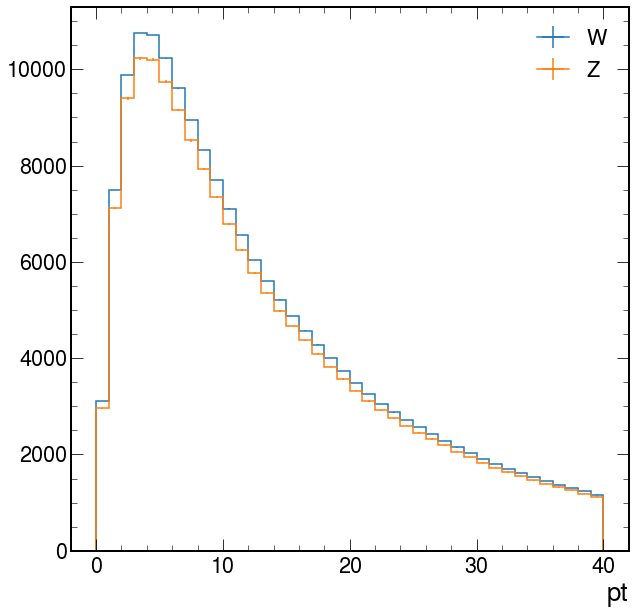

In [672]:
scetlibh.project("pt").plot(label="W")
(100*scetlibhZ).project("pt").plot(label="Z")
plt.legend()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1a67a3610>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

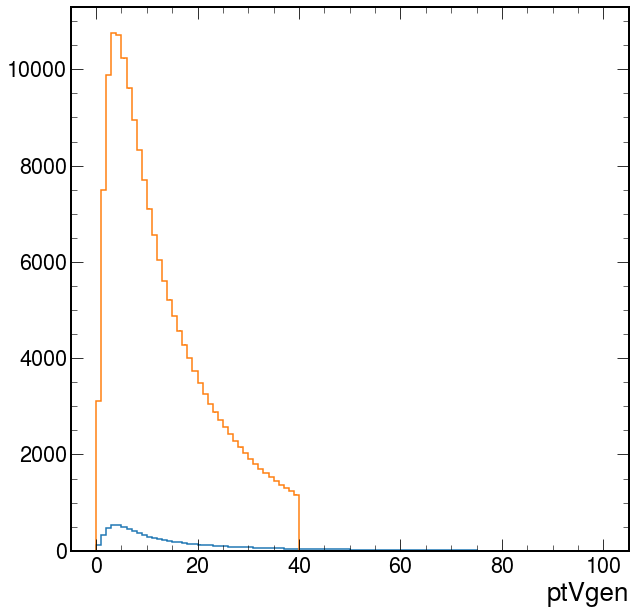

In [680]:
minnloh.project("ptVgen").plot(binwnorm=1., label="MiNNLO")
scetlibh.project("pt").plot(label="SCETlib")

In [685]:
scetlibhWpt = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-0.4-256-gbe3a9cb8/prod/scetlib_run/W/inclusive_Wm_pT.npz")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1a6a12890>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

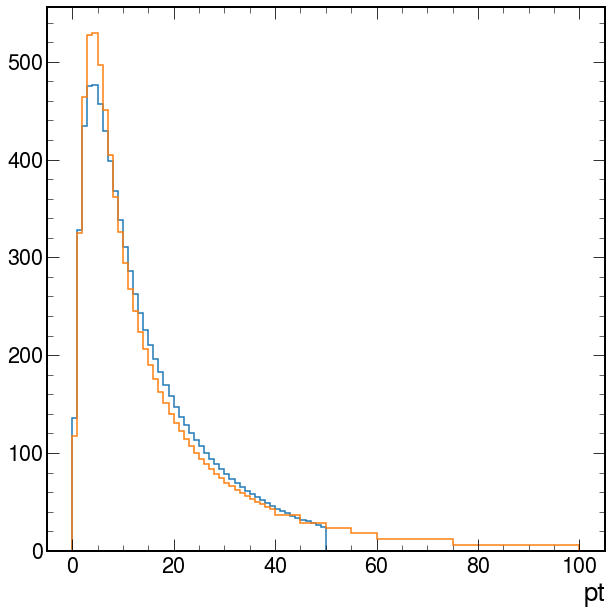

In [691]:
scetlibhWpt[0,...].project("pt").plot(yerr=False)
minnloh.project("ptVgen").plot(binwnorm=1., label="MiNNLO")

In [776]:
scetlibW_y_tot_s = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo.npz")
scetlibW_y_tot_nons = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo_nons.npz")
scetlibW_y_tot = scetlibW_y_tot_s + scetlibW_y_tot_nons

scetlibW_y_A4_s = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo_A4.npz")
#scetlibW_y_A4_nons = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo_A4_nons.npz")
scetlibW_y_A4 = scetlibW_y_A4_s# + scetlibW_y_A4_nons

#s = hist.tag.Slicer()
yax = scetlibW_y_A4.axes["y"]
scetlibW_y_A4[:,:,yax.index(0):,:] = scetlibW_y_A4[:,:,yax.index(0):,:].view()*-1

Text(0.5, 1.0, 'SCETlib structure functions')

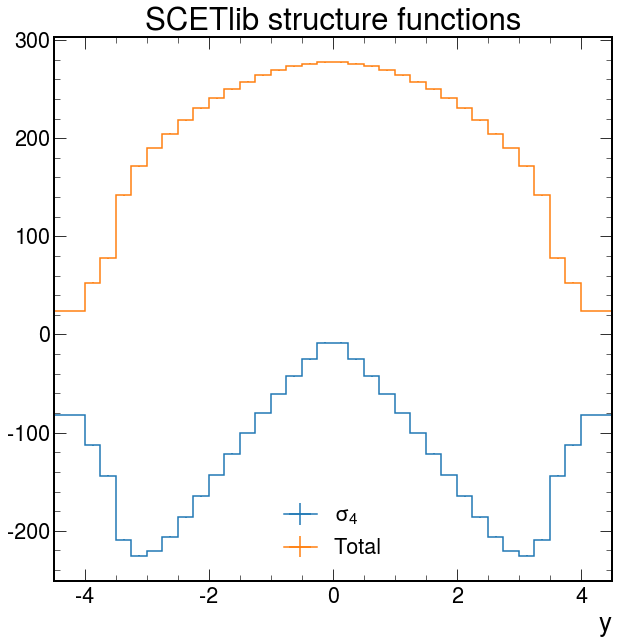

In [832]:
scetlibW_y_A4.project("y").plot(label="$\sigma_{4}$")
scetlibW_y_tot.project("y").plot(label="Total")
plt.legend()
plt.xlim([-4.5, 4.5])
plt.title("SCETlib structure functions")

Text(0.5, 1.0, 'A$_{4}$ (SCETlib)')

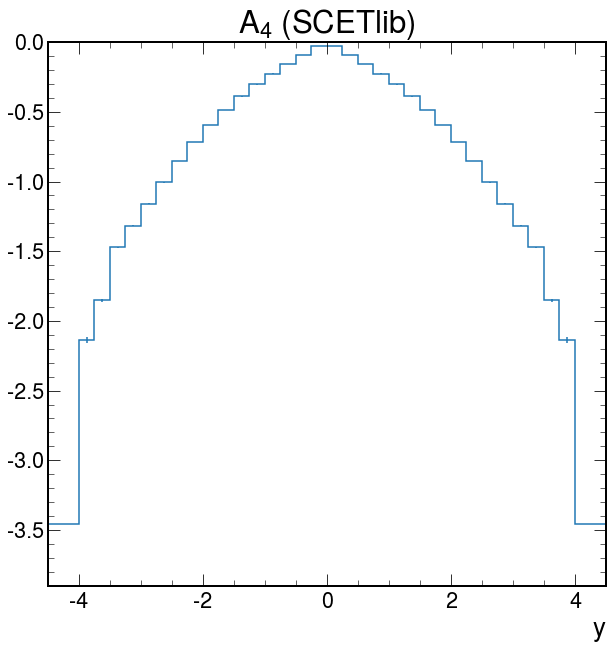

In [801]:
hh.divideHists(scetlibW_y_A4.project("y"), scetlibW_y_tot.project("y"), cutoff=0.001).plot()
plt.xlim([-4.5, 4.5])
plt.title("A$_{4}$ (SCETlib)")

In [812]:
minnlo["WminusmunuPostVFP"].keys()

dict_keys(['dataset', 'weight_sum', 'event_count', 'output'])

In [814]:
minnloByHel = minnlo["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]*minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]/minnlo["WminusmunuPostVFP"]["weight_sum"]
minnloByHel

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=75711.4, variance=452505) (WeightedSum(value=76717.5, variance=452656) with flow)

In [815]:
cenHel = minnloByHel[{"muRfact" : 1.j, "muFfact" : 1.j}]

Text(0.5, 1.0, 'MiNNLO structure functions')

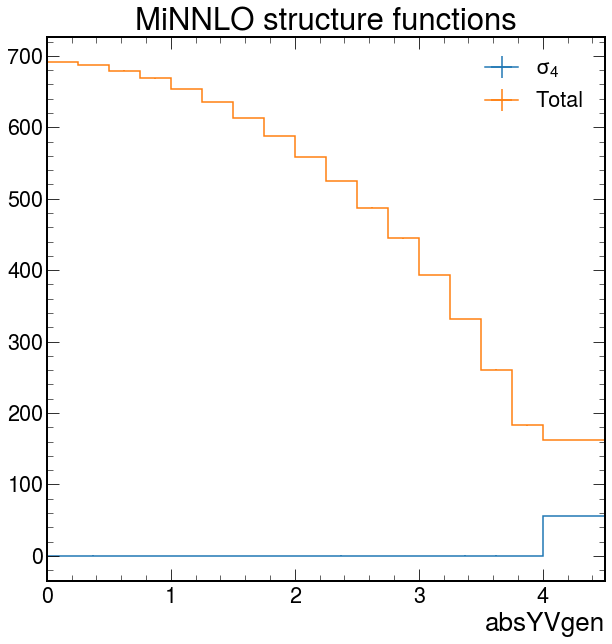

In [831]:
cenHel[{"helicity" : 4.j}].project("absYVgen").plot(label="$\sigma_{4}$")
cenHel.project("absYVgen").plot(label="Total")
plt.legend()
plt.xlim([0., 4.5])
plt.title("MiNNLO structure functions")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa1a3ac6500>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

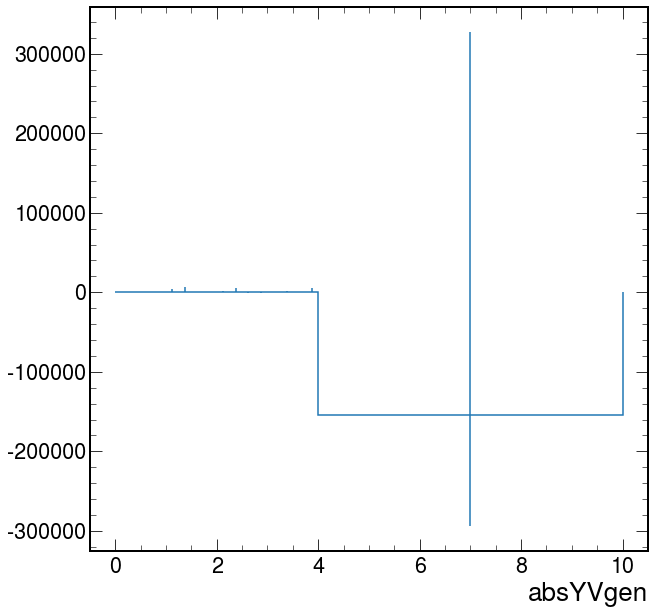

In [806]:
cenHel[{"helicity" : 1.j}].project("absYVgen").plot()